Nvidia GPU's = only GPU's that support **CUDA** = language + framework used to do deep learning

In [1]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
## remove dir if present already, re-clone fastai repo
!rm -r -f fastai
!git clone https://github.com/fastai/fastai.git

Cloning into 'fastai'...
remote: Counting objects: 4822, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 4822 (delta 12), reused 17 (delta 10), pack-reused 4798
Receiving objects: 100% (4822/4822), 189.71 MiB | 37.42 MiB/s, done.
Resolving deltas: 100% (3054/3054), done.


In [0]:
# make sure conda is up to date
#!conda env update

In [4]:
!cd fastai | ls
# make sure fastai is up to date
#! git pull

data  datalab  dogscats.zip  fastai


In [0]:
%matplotlib inline

In [6]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch or torchvision so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl | pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


## Image Classification w/ **Convolutional Neural Networks (CNN)**

### Dogs v. Cats

Will try to enter Dogs v. Cats on Kaggle: 25k labelled photos available for training, 12.5k in test set. At time of competition launch (2013), state of the art = 80% accuracy.

In [7]:
# fixed imread error
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install --no-cache-dir -I pillow
import PIL._imaging

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
    100% |████████████████████████████████| 2.0MB 11.2MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
import sys

# get to directory with .py files
sys.path.insert(0, './fastai/fastai/')

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [9]:
## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-05-09 22:36:12--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip         70%[=============>      ] 575.09M  11.3MB/s    eta 22s    

dogscats.zip        100%[===================>] 817.50M  19.8MB/s    in 65s     

2018-05-09 22:37:17 (12.7 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogs


  inflating: data/dogscats/train/cats/cat.68.jpg  
  inflating: data/dogscats/train/cats/cat.2307.jpg  
  inflating: data/dogscats/train/cats/cat.1078.jpg  
  inflating: data/dogscats/train/cats/cat.5008.jpg  
  inflating: data/dogscats/train/cats/cat.2013.jpg  
  inflating: data/dogscats/train/cats/cat.5505.jpg  
  inflating: data/dogscats/train/cats/cat.980.jpg  
  inflating: data/dogscats/train/cats/cat.8390.jpg  
  inflating: data/dogscats/train/cats/cat.1971.jpg  
  inflating: data/dogscats/train/cats/cat.11247.jpg  
  inflating: data/dogscats/train/cats/cat.10178.jpg  
  inflating: data/dogscats/train/cats/cat.5776.jpg  
  inflating: data/dogscats/train/cats/cat.11890.jpg  
  inflating: data/dogscats/train/cats/cat.7723.jpg  
  inflating: data/dogscats/train/cats/cat.7823.jpg  
  inflating: data/dogscats/train/cats/cat.10719.jpg  
  inflating: data/dogscats/train/cats/cat.7804.jpg  
  inflating: data/dogscats/train/cats/cat.3498.jpg  
  inflating: data/dogscats/train/cats/cat.12


  inflating: data/dogscats/train/cats/cat.3452.jpg  
  inflating: data/dogscats/train/cats/cat.4171.jpg  
  inflating: data/dogscats/train/cats/cat.1395.jpg  
  inflating: data/dogscats/train/cats/cat.6760.jpg  
  inflating: data/dogscats/train/cats/cat.1857.jpg  
  inflating: data/dogscats/train/cats/cat.11934.jpg  
  inflating: data/dogscats/train/cats/cat.4723.jpg  
  inflating: data/dogscats/train/cats/cat.9964.jpg  
  inflating: data/dogscats/train/cats/cat.12243.jpg  
  inflating: data/dogscats/train/cats/cat.10995.jpg  
  inflating: data/dogscats/train/cats/cat.11088.jpg  
  inflating: data/dogscats/train/cats/cat.1484.jpg  
  inflating: data/dogscats/train/cats/cat.1854.jpg  
  inflating: data/dogscats/train/cats/cat.11931.jpg  
  inflating: data/dogscats/train/cats/cat.4878.jpg  
  inflating: data/dogscats/train/cats/cat.1222.jpg  
  inflating: data/dogscats/train/cats/cat.12200.jpg  
  inflating: data/dogscats/train/cats/cat.113.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.10850.jpg  
  inflating: data/dogscats/train/cats/cat.9405.jpg  
  inflating: data/dogscats/train/cats/cat.3520.jpg  
  inflating: data/dogscats/train/cats/cat.10707.jpg  
  inflating: data/dogscats/train/cats/cat.4132.jpg  
  inflating: data/dogscats/train/cats/cat.10508.jpg  
  inflating: data/dogscats/train/cats/cat.3033.jpg  
  inflating: data/dogscats/train/cats/cat.10922.jpg  
  inflating: data/dogscats/train/cats/cat.1570.jpg  
  inflating: data/dogscats/train/cats/cat.3750.jpg  
  inflating: data/dogscats/train/cats/cat.9403.jpg  
  inflating: data/dogscats/train/cats/cat.8001.jpg  
  inflating: data/dogscats/train/cats/cat.10733.jpg  
  inflating: data/dogscats/train/cats/cat.8259.jpg  
  inflating: data/dogscats/train/cats/cat.5230.jpg  
  inflating: data/dogscats/train/cats/cat.7356.jpg  
  inflating: data/dogscats/train/cats/cat.8320.jpg  
  inflating: data/dogscats/train/cats/cat.11149.jpg  
  inflating: data/dogscats/train/cats/ca


  inflating: data/dogscats/train/cats/cat.6752.jpg  
  inflating: data/dogscats/train/cats/cat.9014.jpg  
  inflating: data/dogscats/train/cats/cat.8916.jpg  
  inflating: data/dogscats/train/cats/cat.1018.jpg  
  inflating: data/dogscats/train/cats/cat.366.jpg  
  inflating: data/dogscats/train/cats/cat.2174.jpg  
  inflating: data/dogscats/train/cats/cat.9096.jpg  
  inflating: data/dogscats/train/cats/cat.6736.jpg  
  inflating: data/dogscats/train/cats/cat.1778.jpg  
  inflating: data/dogscats/train/cats/cat.967.jpg  
  inflating: data/dogscats/train/cats/cat.9337.jpg  
  inflating: data/dogscats/train/cats/cat.3967.jpg  
  inflating: data/dogscats/train/cats/cat.11817.jpg  
  inflating: data/dogscats/train/cats/cat.7661.jpg  
  inflating: data/dogscats/train/cats/cat.10303.jpg  
  inflating: data/dogscats/train/cats/cat.683.jpg  
  inflating: data/dogscats/train/cats/cat.11090.jpg  
  inflating: data/dogscats/train/cats/cat.4075.jpg  
  inflating: data/dogscats/train/cats/cat.511

  inflating: data/dogscats/train/cats/cat.10218.jpg  
  inflating: data/dogscats/train/cats/cat.4264.jpg  
  inflating: data/dogscats/train/cats/cat.9109.jpg  
  inflating: data/dogscats/train/cats/cat.9839.jpg  
  inflating: data/dogscats/train/cats/cat.9700.jpg  
  inflating: data/dogscats/train/cats/cat.1937.jpg  
  inflating: data/dogscats/train/cats/cat.3091.jpg  
  inflating: data/dogscats/train/cats/cat.8726.jpg  
  inflating: data/dogscats/train/cats/cat.11784.jpg  
  inflating: data/dogscats/train/cats/cat.11714.jpg  
  inflating: data/dogscats/train/cats/cat.10137.jpg  
  inflating: data/dogscats/train/cats/cat.3855.jpg  
  inflating: data/dogscats/train/cats/cat.4429.jpg  
  inflating: data/dogscats/train/cats/cat.4586.jpg  
  inflating: data/dogscats/train/cats/cat.286.jpg  
  inflating: data/dogscats/train/cats/cat.10124.jpg  
  inflating: data/dogscats/train/cats/cat.2668.jpg  
  inflating: data/dogscats/train/cats/cat.12492.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.8128.jpg  
  inflating: data/dogscats/train/cats/cat.6979.jpg  
  inflating: data/dogscats/train/cats/cat.8388.jpg  
  inflating: data/dogscats/train/cats/cat.3218.jpg  
  inflating: data/dogscats/train/cats/cat.8620.jpg  
  inflating: data/dogscats/train/cats/cat.3941.jpg  
  inflating: data/dogscats/train/cats/cat.808.jpg  
  inflating: data/dogscats/train/cats/cat.3144.jpg  
  inflating: data/dogscats/train/cats/cat.1268.jpg  
  inflating: data/dogscats/train/cats/cat.8557.jpg  
  inflating: data/dogscats/train/cats/cat.2697.jpg  
  inflating: data/dogscats/train/cats/cat.2965.jpg  
  inflating: data/dogscats/train/cats/cat.2440.jpg  
  inflating: data/dogscats/train/cats/cat.1065.jpg  
  inflating: data/dogscats/train/cats/cat.3471.jpg  
  inflating: data/dogscats/train/cats/cat.5762.jpg  
  inflating: data/dogscats/train/cats/cat.7008.jpg  
  inflating: data/dogscats/train/cats/cat.3998.jpg  
  inflating: data/dogscats/train/cats/cat.1224


  inflating: data/dogscats/train/cats/cat.1017.jpg  
  inflating: data/dogscats/train/cats/cat.1209.jpg  
  inflating: data/dogscats/train/cats/cat.10063.jpg  
  inflating: data/dogscats/train/cats/cat.6308.jpg  
  inflating: data/dogscats/train/cats/cat.3118.jpg  
  inflating: data/dogscats/train/cats/cat.10184.jpg  
  inflating: data/dogscats/train/cats/cat.8263.jpg  
  inflating: data/dogscats/train/cats/cat.355.jpg  
  inflating: data/dogscats/train/cats/cat.5079.jpg  
  inflating: data/dogscats/train/cats/cat.11472.jpg  
  inflating: data/dogscats/train/cats/cat.6755.jpg  
  inflating: data/dogscats/train/cats/cat.3838.jpg  
  inflating: data/dogscats/train/cats/cat.8975.jpg  
  inflating: data/dogscats/train/cats/cat.6029.jpg  
  inflating: data/dogscats/train/cats/cat.4336.jpg  
  inflating: data/dogscats/train/cats/cat.2670.jpg  
  inflating: data/dogscats/train/cats/cat.6913.jpg  
  inflating: data/dogscats/train/cats/cat.934.jpg  
  inflating: data/dogscats/train/cats/cat.45

  inflating: data/dogscats/train/cats/cat.7694.jpg  
  inflating: data/dogscats/train/cats/cat.2625.jpg  
  inflating: data/dogscats/train/cats/cat.8423.jpg  
  inflating: data/dogscats/train/cats/cat.6260.jpg  
  inflating: data/dogscats/train/cats/cat.7458.jpg  
  inflating: data/dogscats/train/cats/cat.9300.jpg  
  inflating: data/dogscats/train/cats/cat.11960.jpg  
  inflating: data/dogscats/train/cats/cat.11029.jpg  
  inflating: data/dogscats/train/cats/cat.1088.jpg  
  inflating: data/dogscats/train/cats/cat.8099.jpg  
  inflating: data/dogscats/train/cats/cat.6058.jpg  
  inflating: data/dogscats/train/cats/cat.11214.jpg  
  inflating: data/dogscats/train/cats/cat.936.jpg  
  inflating: data/dogscats/train/cats/cat.2873.jpg  
  inflating: data/dogscats/train/cats/cat.11031.jpg  
  inflating: data/dogscats/train/cats/cat.3229.jpg  
  inflating: data/dogscats/train/cats/cat.4358.jpg  
  inflating: data/dogscats/train/cats/cat.11925.jpg  
  inflating: data/dogscats/train/cats/cat.

  inflating: data/dogscats/train/cats/cat.10098.jpg  
  inflating: data/dogscats/train/cats/cat.8514.jpg  
  inflating: data/dogscats/train/cats/cat.4270.jpg  
  inflating: data/dogscats/train/cats/cat.9469.jpg  
  inflating: data/dogscats/train/cats/cat.1590.jpg  
  inflating: data/dogscats/train/cats/cat.9721.jpg  
  inflating: data/dogscats/train/cats/cat.5343.jpg  
  inflating: data/dogscats/train/cats/cat.2514.jpg  
  inflating: data/dogscats/train/cats/cat.10724.jpg  
  inflating: data/dogscats/train/cats/cat.4369.jpg  
  inflating: data/dogscats/train/cats/cat.10826.jpg  
  inflating: data/dogscats/train/cats/cat.4760.jpg  
  inflating: data/dogscats/train/cats/cat.3507.jpg  
  inflating: data/dogscats/train/cats/cat.4217.jpg  
  inflating: data/dogscats/train/cats/cat.851.jpg  
  inflating: data/dogscats/train/cats/cat.5407.jpg  
  inflating: data/dogscats/train/cats/cat.4663.jpg  
  inflating: data/dogscats/train/cats/cat.1535.jpg  
  inflating: data/dogscats/train/cats/cat.50

  inflating: data/dogscats/train/cats/cat.11630.jpg  
  inflating: data/dogscats/train/cats/cat.11930.jpg  
  inflating: data/dogscats/train/cats/cat.4005.jpg  
  inflating: data/dogscats/train/cats/cat.11209.jpg  
  inflating: data/dogscats/train/cats/cat.6562.jpg  
  inflating: data/dogscats/train/cats/cat.8056.jpg  
  inflating: data/dogscats/train/cats/cat.1309.jpg  
  inflating: data/dogscats/train/cats/cat.11322.jpg  
  inflating: data/dogscats/train/cats/cat.506.jpg  
  inflating: data/dogscats/train/cats/cat.9285.jpg  
  inflating: data/dogscats/train/cats/cat.7895.jpg  
  inflating: data/dogscats/train/cats/cat.4545.jpg  
  inflating: data/dogscats/train/cats/cat.3400.jpg  
  inflating: data/dogscats/train/cats/cat.11522.jpg  
  inflating: data/dogscats/train/cats/cat.9623.jpg  
  inflating: data/dogscats/train/cats/cat.8161.jpg  
  inflating: data/dogscats/train/cats/cat.4633.jpg  
  inflating: data/dogscats/train/cats/cat.5911.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.1175.jpg  
  inflating: data/dogscats/train/cats/cat.278.jpg  
  inflating: data/dogscats/train/cats/cat.7316.jpg  
  inflating: data/dogscats/train/cats/cat.2576.jpg  
  inflating: data/dogscats/train/cats/cat.10555.jpg  
  inflating: data/dogscats/train/cats/cat.2886.jpg  
  inflating: data/dogscats/train/cats/cat.8884.jpg  
  inflating: data/dogscats/train/cats/cat.10894.jpg  
  inflating: data/dogscats/train/cats/cat.5061.jpg  
  inflating: data/dogscats/train/cats/cat.1093.jpg  
  inflating: data/dogscats/train/cats/cat.912.jpg  
  inflating: data/dogscats/train/cats/cat.102.jpg  
  inflating: data/dogscats/train/cats/cat.10456.jpg  
  inflating: data/dogscats/train/cats/cat.6174.jpg  
  inflating: data/dogscats/train/cats/cat.2766.jpg  
  inflating: data/dogscats/train/cats/cat.1701.jpg  
  inflating: data/dogscats/train/cats/cat.9835.jpg  
  inflating: data/dogscats/train/cats/cat.7434.jpg  
  inflating: data/dogscats/train/cats/cat.751


  inflating: data/dogscats/train/cats/cat.3673.jpg  
  inflating: data/dogscats/train/cats/cat.1313.jpg  
  inflating: data/dogscats/train/cats/cat.11918.jpg  
  inflating: data/dogscats/train/cats/cat.10482.jpg  
  inflating: data/dogscats/train/cats/cat.11113.jpg  
  inflating: data/dogscats/train/cats/cat.5182.jpg  
  inflating: data/dogscats/train/cats/cat.2856.jpg  
  inflating: data/dogscats/train/cats/cat.1926.jpg  
  inflating: data/dogscats/train/cats/cat.4453.jpg  
  inflating: data/dogscats/train/cats/cat.9249.jpg  
  inflating: data/dogscats/train/cats/cat.7632.jpg  
  inflating: data/dogscats/train/cats/cat.5282.jpg  
  inflating: data/dogscats/train/cats/cat.7136.jpg  
  inflating: data/dogscats/train/cats/cat.11526.jpg  
  inflating: data/dogscats/train/cats/cat.1398.jpg  
  inflating: data/dogscats/train/cats/cat.3066.jpg  
  inflating: data/dogscats/train/cats/cat.11712.jpg  
  inflating: data/dogscats/train/cats/cat.9007.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.2286.jpg  
  inflating: data/dogscats/train/cats/cat.10824.jpg  
  inflating: data/dogscats/train/cats/cat.10568.jpg  
  inflating: data/dogscats/train/cats/cat.4737.jpg  
  inflating: data/dogscats/train/cats/cat.10165.jpg  
  inflating: data/dogscats/train/cats/cat.946.jpg  
  inflating: data/dogscats/train/cats/cat.10614.jpg  
  inflating: data/dogscats/train/cats/cat.6101.jpg  
  inflating: data/dogscats/train/cats/cat.5950.jpg  
  inflating: data/dogscats/train/cats/cat.9553.jpg  
  inflating: data/dogscats/train/cats/cat.2296.jpg  
  inflating: data/dogscats/train/cats/cat.8070.jpg  
  inflating: data/dogscats/train/cats/cat.6856.jpg  
  inflating: data/dogscats/train/cats/cat.7832.jpg  
  inflating: data/dogscats/train/cats/cat.1593.jpg  
  inflating: data/dogscats/train/cats/cat.9057.jpg  
  inflating: data/dogscats/train/cats/cat.6204.jpg  
  inflating: data/dogscats/train/cats/cat.12039.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.5187.jpg  
  inflating: data/dogscats/train/cats/cat.10108.jpg  
  inflating: data/dogscats/train/cats/cat.4323.jpg  
  inflating: data/dogscats/train/cats/cat.8813.jpg  
  inflating: data/dogscats/train/cats/cat.5404.jpg  
  inflating: data/dogscats/train/cats/cat.942.jpg  
  inflating: data/dogscats/train/cats/cat.9290.jpg  
  inflating: data/dogscats/train/cats/cat.4851.jpg  
  inflating: data/dogscats/train/cats/cat.6317.jpg  
  inflating: data/dogscats/train/cats/cat.11453.jpg  
  inflating: data/dogscats/train/cats/cat.2701.jpg  
  inflating: data/dogscats/train/cats/cat.2459.jpg  
  inflating: data/dogscats/train/cats/cat.3720.jpg  
  inflating: data/dogscats/train/cats/cat.8922.jpg  
  inflating: data/dogscats/train/cats/cat.7393.jpg  
  inflating: data/dogscats/train/cats/cat.6194.jpg  
  inflating: data/dogscats/train/cats/cat.1316.jpg  
  inflating: data/dogscats/train/cats/cat.1486.jpg  
  inflating: data/dogscats/train/cats/cat.82


  inflating: data/dogscats/train/cats/cat.848.jpg  
  inflating: data/dogscats/train/cats/cat.12226.jpg  
  inflating: data/dogscats/train/cats/cat.5965.jpg  
  inflating: data/dogscats/train/cats/cat.9589.jpg  
  inflating: data/dogscats/train/cats/cat.6584.jpg  
  inflating: data/dogscats/train/cats/cat.11195.jpg  
  inflating: data/dogscats/train/cats/cat.9266.jpg  
  inflating: data/dogscats/train/cats/cat.2269.jpg  
  inflating: data/dogscats/train/cats/cat.2877.jpg  
  inflating: data/dogscats/train/cats/cat.6696.jpg  
  inflating: data/dogscats/train/cats/cat.3550.jpg  
  inflating: data/dogscats/train/cats/cat.7177.jpg  
  inflating: data/dogscats/train/cats/cat.3634.jpg  
  inflating: data/dogscats/train/cats/cat.9315.jpg  
  inflating: data/dogscats/train/cats/cat.10844.jpg  
  inflating: data/dogscats/train/cats/cat.9356.jpg  
  inflating: data/dogscats/train/cats/cat.6959.jpg  
  inflating: data/dogscats/train/cats/cat.1413.jpg  
  inflating: data/dogscats/train/cats/cat.9


  inflating: data/dogscats/train/cats/cat.8597.jpg  
  inflating: data/dogscats/train/cats/cat.3666.jpg  
  inflating: data/dogscats/train/cats/cat.8928.jpg  
  inflating: data/dogscats/train/cats/cat.2046.jpg  
  inflating: data/dogscats/train/cats/cat.3317.jpg  
  inflating: data/dogscats/train/cats/cat.6236.jpg  
  inflating: data/dogscats/train/cats/cat.9659.jpg  
  inflating: data/dogscats/train/cats/cat.7946.jpg  
  inflating: data/dogscats/train/cats/cat.7413.jpg  
  inflating: data/dogscats/train/cats/cat.8209.jpg  
  inflating: data/dogscats/train/cats/cat.3328.jpg  
  inflating: data/dogscats/train/cats/cat.6232.jpg  
  inflating: data/dogscats/train/cats/cat.2639.jpg  
  inflating: data/dogscats/train/cats/cat.943.jpg  
  inflating: data/dogscats/train/cats/cat.7438.jpg  
  inflating: data/dogscats/train/cats/cat.4449.jpg  
  inflating: data/dogscats/train/cats/cat.5044.jpg  
  inflating: data/dogscats/train/cats/cat.9680.jpg  
  inflating: data/dogscats/train/cats/cat.4021

  inflating: data/dogscats/train/cats/cat.10764.jpg  
  inflating: data/dogscats/train/cats/cat.8297.jpg  
  inflating: data/dogscats/train/cats/cat.10876.jpg  
  inflating: data/dogscats/train/cats/cat.11386.jpg  
  inflating: data/dogscats/train/cats/cat.691.jpg  
  inflating: data/dogscats/train/cats/cat.5749.jpg  
  inflating: data/dogscats/train/cats/cat.9511.jpg  
  inflating: data/dogscats/train/cats/cat.9087.jpg  
  inflating: data/dogscats/train/cats/cat.7902.jpg  
  inflating: data/dogscats/train/cats/cat.11283.jpg  
  inflating: data/dogscats/train/cats/cat.3303.jpg  
  inflating: data/dogscats/train/cats/cat.1123.jpg  
  inflating: data/dogscats/train/cats/cat.11558.jpg  
  inflating: data/dogscats/train/cats/cat.5090.jpg  
  inflating: data/dogscats/train/cats/cat.9333.jpg  
  inflating: data/dogscats/train/cats/cat.12059.jpg  
  inflating: data/dogscats/train/cats/cat.10164.jpg  
  inflating: data/dogscats/train/cats/cat.269.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.7240.jpg  
  inflating: data/dogscats/train/cats/cat.10839.jpg  
  inflating: data/dogscats/train/cats/cat.11062.jpg  
  inflating: data/dogscats/train/cats/cat.7144.jpg  
  inflating: data/dogscats/train/cats/cat.6503.jpg  
  inflating: data/dogscats/train/cats/cat.9102.jpg  
  inflating: data/dogscats/train/cats/cat.1678.jpg  
  inflating: data/dogscats/train/cats/cat.9929.jpg  
  inflating: data/dogscats/train/cats/cat.3983.jpg  
  inflating: data/dogscats/train/cats/cat.3712.jpg  
  inflating: data/dogscats/train/cats/cat.11583.jpg  
  inflating: data/dogscats/train/cats/cat.8565.jpg  
  inflating: data/dogscats/train/cats/cat.9765.jpg  
  inflating: data/dogscats/train/cats/cat.11183.jpg  
  inflating: data/dogscats/train/cats/cat.1885.jpg  
  inflating: data/dogscats/train/cats/cat.1592.jpg  
  inflating: data/dogscats/train/cats/cat.8248.jpg  
  inflating: data/dogscats/train/cats/cat.7044.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.7227.jpg  
  inflating: data/dogscats/train/cats/cat.5903.jpg  
  inflating: data/dogscats/train/cats/cat.5270.jpg  
  inflating: data/dogscats/train/cats/cat.2592.jpg  
  inflating: data/dogscats/train/cats/cat.5489.jpg  
  inflating: data/dogscats/train/cats/cat.1317.jpg  
  inflating: data/dogscats/train/cats/cat.3962.jpg  
  inflating: data/dogscats/train/cats/cat.2050.jpg  
  inflating: data/dogscats/train/cats/cat.6456.jpg  
  inflating: data/dogscats/train/cats/cat.3916.jpg  
  inflating: data/dogscats/train/cats/cat.1354.jpg  
  inflating: data/dogscats/train/cats/cat.1299.jpg  
  inflating: data/dogscats/train/cats/cat.9934.jpg  
  inflating: data/dogscats/train/cats/cat.3595.jpg  
  inflating: data/dogscats/train/cats/cat.2943.jpg  
  inflating: data/dogscats/train/cats/cat.10675.jpg  
  inflating: data/dogscats/train/cats/cat.9881.jpg  
  inflating: data/dogscats/train/cats/cat.9634.jpg  
  inflating: data/dogscats/train/cats/cat.12


  inflating: data/dogscats/train/dogs/dog.6272.jpg  
  inflating: data/dogscats/train/dogs/dog.8417.jpg  
  inflating: data/dogscats/train/dogs/dog.2491.jpg  
  inflating: data/dogscats/train/dogs/dog.10605.jpg  
  inflating: data/dogscats/train/dogs/dog.6162.jpg  
  inflating: data/dogscats/train/dogs/dog.2016.jpg  
  inflating: data/dogscats/train/dogs/dog.8145.jpg  
  inflating: data/dogscats/train/dogs/dog.3642.jpg  
  inflating: data/dogscats/train/dogs/dog.8588.jpg  
  inflating: data/dogscats/train/dogs/dog.5310.jpg  
  inflating: data/dogscats/train/dogs/dog.401.jpg  
  inflating: data/dogscats/train/dogs/dog.12329.jpg  
  inflating: data/dogscats/train/dogs/dog.9121.jpg  
  inflating: data/dogscats/train/dogs/dog.9519.jpg  
  inflating: data/dogscats/train/dogs/dog.3026.jpg  
  inflating: data/dogscats/train/dogs/dog.11743.jpg  
  inflating: data/dogscats/train/dogs/dog.8473.jpg  
  inflating: data/dogscats/train/dogs/dog.7568.jpg  
  inflating: data/dogscats/train/dogs/dog.5


  inflating: data/dogscats/train/dogs/dog.7666.jpg  
  inflating: data/dogscats/train/dogs/dog.9733.jpg  
  inflating: data/dogscats/train/dogs/dog.1846.jpg  
  inflating: data/dogscats/train/dogs/dog.11419.jpg  
  inflating: data/dogscats/train/dogs/dog.6880.jpg  
  inflating: data/dogscats/train/dogs/dog.599.jpg  
  inflating: data/dogscats/train/dogs/dog.1593.jpg  
  inflating: data/dogscats/train/dogs/dog.6289.jpg  
  inflating: data/dogscats/train/dogs/dog.2585.jpg  
  inflating: data/dogscats/train/dogs/dog.7356.jpg  
  inflating: data/dogscats/train/dogs/dog.6696.jpg  
  inflating: data/dogscats/train/dogs/dog.4254.jpg  
  inflating: data/dogscats/train/dogs/dog.2027.jpg  
  inflating: data/dogscats/train/dogs/dog.6872.jpg  
  inflating: data/dogscats/train/dogs/dog.8333.jpg  
  inflating: data/dogscats/train/dogs/dog.7884.jpg  
  inflating: data/dogscats/train/dogs/dog.11998.jpg  
  inflating: data/dogscats/train/dogs/dog.7482.jpg  
  inflating: data/dogscats/train/dogs/dog.52


  inflating: data/dogscats/train/dogs/dog.12376.jpg  
  inflating: data/dogscats/train/dogs/dog.11403.jpg  
  inflating: data/dogscats/train/dogs/dog.11360.jpg  
  inflating: data/dogscats/train/dogs/dog.9172.jpg  
  inflating: data/dogscats/train/dogs/dog.6683.jpg  
  inflating: data/dogscats/train/dogs/dog.2724.jpg  
  inflating: data/dogscats/train/dogs/dog.3247.jpg  
  inflating: data/dogscats/train/dogs/dog.6465.jpg  
  inflating: data/dogscats/train/dogs/dog.883.jpg  
  inflating: data/dogscats/train/dogs/dog.748.jpg  
  inflating: data/dogscats/train/dogs/dog.1832.jpg  
  inflating: data/dogscats/train/dogs/dog.4556.jpg  
  inflating: data/dogscats/train/dogs/dog.1121.jpg  
  inflating: data/dogscats/train/dogs/dog.1103.jpg  
  inflating: data/dogscats/train/dogs/dog.7758.jpg  
  inflating: data/dogscats/train/dogs/dog.4969.jpg  
  inflating: data/dogscats/train/dogs/dog.1542.jpg  
  inflating: data/dogscats/train/dogs/dog.4667.jpg  
  inflating: data/dogscats/train/dogs/dog.23

  inflating: data/dogscats/train/dogs/dog.7111.jpg  
  inflating: data/dogscats/train/dogs/dog.5867.jpg  
  inflating: data/dogscats/train/dogs/dog.11511.jpg  
  inflating: data/dogscats/train/dogs/dog.4010.jpg  
  inflating: data/dogscats/train/dogs/dog.1425.jpg  
  inflating: data/dogscats/train/dogs/dog.4083.jpg  
  inflating: data/dogscats/train/dogs/dog.4081.jpg  
  inflating: data/dogscats/train/dogs/dog.1880.jpg  
  inflating: data/dogscats/train/dogs/dog.5221.jpg  
  inflating: data/dogscats/train/dogs/dog.12114.jpg  
  inflating: data/dogscats/train/dogs/dog.8338.jpg  
  inflating: data/dogscats/train/dogs/dog.216.jpg  
  inflating: data/dogscats/train/dogs/dog.9506.jpg  
  inflating: data/dogscats/train/dogs/dog.6858.jpg  
  inflating: data/dogscats/train/dogs/dog.10084.jpg  
  inflating: data/dogscats/train/dogs/dog.12393.jpg  
  inflating: data/dogscats/train/dogs/dog.5301.jpg  
  inflating: data/dogscats/train/dogs/dog.8935.jpg  
  inflating: data/dogscats/train/dogs/dog.9


  inflating: data/dogscats/train/dogs/dog.2604.jpg  
  inflating: data/dogscats/train/dogs/dog.7561.jpg  
  inflating: data/dogscats/train/dogs/dog.11282.jpg  
  inflating: data/dogscats/train/dogs/dog.11002.jpg  
  inflating: data/dogscats/train/dogs/dog.11217.jpg  
  inflating: data/dogscats/train/dogs/dog.7731.jpg  
  inflating: data/dogscats/train/dogs/dog.5932.jpg  
  inflating: data/dogscats/train/dogs/dog.2565.jpg  
  inflating: data/dogscats/train/dogs/dog.2296.jpg  
  inflating: data/dogscats/train/dogs/dog.1622.jpg  
  inflating: data/dogscats/train/dogs/dog.3448.jpg  
  inflating: data/dogscats/train/dogs/dog.9567.jpg  
  inflating: data/dogscats/train/dogs/dog.4774.jpg  
  inflating: data/dogscats/train/dogs/dog.6847.jpg  
  inflating: data/dogscats/train/dogs/dog.4146.jpg  
  inflating: data/dogscats/train/dogs/dog.8216.jpg  
  inflating: data/dogscats/train/dogs/dog.3535.jpg  
  inflating: data/dogscats/train/dogs/dog.10772.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.11972.jpg  
  inflating: data/dogscats/train/dogs/dog.10545.jpg  
  inflating: data/dogscats/train/dogs/dog.1678.jpg  
  inflating: data/dogscats/train/dogs/dog.3608.jpg  
  inflating: data/dogscats/train/dogs/dog.9255.jpg  
  inflating: data/dogscats/train/dogs/dog.8782.jpg  
  inflating: data/dogscats/train/dogs/dog.6080.jpg  
  inflating: data/dogscats/train/dogs/dog.4163.jpg  
  inflating: data/dogscats/train/dogs/dog.1680.jpg  
  inflating: data/dogscats/train/dogs/dog.11210.jpg  
  inflating: data/dogscats/train/dogs/dog.7948.jpg  
  inflating: data/dogscats/train/dogs/dog.9248.jpg  
  inflating: data/dogscats/train/dogs/dog.11953.jpg  
  inflating: data/dogscats/train/dogs/dog.9775.jpg  
  inflating: data/dogscats/train/dogs/dog.5939.jpg  
  inflating: data/dogscats/train/dogs/dog.925.jpg  
  inflating: data/dogscats/train/dogs/dog.6682.jpg  
  inflating: data/dogscats/train/dogs/dog.9614.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.6604.jpg  
  inflating: data/dogscats/train/dogs/dog.10885.jpg  
  inflating: data/dogscats/train/dogs/dog.782.jpg  
  inflating: data/dogscats/train/dogs/dog.7358.jpg  
  inflating: data/dogscats/train/dogs/dog.2304.jpg  
  inflating: data/dogscats/train/dogs/dog.1988.jpg  
  inflating: data/dogscats/train/dogs/dog.8254.jpg  
  inflating: data/dogscats/train/dogs/dog.12431.jpg  
  inflating: data/dogscats/train/dogs/dog.10706.jpg  
  inflating: data/dogscats/train/dogs/dog.7726.jpg  
  inflating: data/dogscats/train/dogs/dog.4443.jpg  
  inflating: data/dogscats/train/dogs/dog.3905.jpg  
  inflating: data/dogscats/train/dogs/dog.11587.jpg  
  inflating: data/dogscats/train/dogs/dog.223.jpg  
  inflating: data/dogscats/train/dogs/dog.4729.jpg  
  inflating: data/dogscats/train/dogs/dog.12398.jpg  
  inflating: data/dogscats/train/dogs/dog.170.jpg  
  inflating: data/dogscats/train/dogs/dog.5741.jpg  
  inflating: data/dogscats/train/dogs/dog.4

  inflating: data/dogscats/train/dogs/dog.7742.jpg  
  inflating: data/dogscats/train/dogs/dog.8783.jpg  
  inflating: data/dogscats/train/dogs/dog.1863.jpg  
  inflating: data/dogscats/train/dogs/dog.8670.jpg  
  inflating: data/dogscats/train/dogs/dog.2568.jpg  
  inflating: data/dogscats/train/dogs/dog.9655.jpg  
  inflating: data/dogscats/train/dogs/dog.2058.jpg  
  inflating: data/dogscats/train/dogs/dog.746.jpg  
  inflating: data/dogscats/train/dogs/dog.6777.jpg  
  inflating: data/dogscats/train/dogs/dog.666.jpg  
  inflating: data/dogscats/train/dogs/dog.7733.jpg  
  inflating: data/dogscats/train/dogs/dog.6937.jpg  
  inflating: data/dogscats/train/dogs/dog.244.jpg  
  inflating: data/dogscats/train/dogs/dog.2205.jpg  
  inflating: data/dogscats/train/dogs/dog.3908.jpg  
  inflating: data/dogscats/train/dogs/dog.649.jpg  
  inflating: data/dogscats/train/dogs/dog.8539.jpg  
  inflating: data/dogscats/train/dogs/dog.3624.jpg  
  inflating: data/dogscats/train/dogs/dog.4941.jpg

  inflating: data/dogscats/train/dogs/dog.11666.jpg  
  inflating: data/dogscats/train/dogs/dog.8561.jpg  
  inflating: data/dogscats/train/dogs/dog.5478.jpg  
  inflating: data/dogscats/train/dogs/dog.1485.jpg  
  inflating: data/dogscats/train/dogs/dog.7032.jpg  
  inflating: data/dogscats/train/dogs/dog.3864.jpg  
  inflating: data/dogscats/train/dogs/dog.8428.jpg  
  inflating: data/dogscats/train/dogs/dog.9488.jpg  
  inflating: data/dogscats/train/dogs/dog.3610.jpg  
  inflating: data/dogscats/train/dogs/dog.9623.jpg  
  inflating: data/dogscats/train/dogs/dog.4996.jpg  
  inflating: data/dogscats/train/dogs/dog.5024.jpg  
  inflating: data/dogscats/train/dogs/dog.11512.jpg  
  inflating: data/dogscats/train/dogs/dog.10025.jpg  
  inflating: data/dogscats/train/dogs/dog.1274.jpg  
  inflating: data/dogscats/train/dogs/dog.11385.jpg  
  inflating: data/dogscats/train/dogs/dog.10367.jpg  
  inflating: data/dogscats/train/dogs/dog.2506.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.6940.jpg  
  inflating: data/dogscats/train/dogs/dog.3020.jpg  
  inflating: data/dogscats/train/dogs/dog.4507.jpg  
  inflating: data/dogscats/train/dogs/dog.4322.jpg  
  inflating: data/dogscats/train/dogs/dog.1527.jpg  
  inflating: data/dogscats/train/dogs/dog.2167.jpg  
  inflating: data/dogscats/train/dogs/dog.5966.jpg  
  inflating: data/dogscats/train/dogs/dog.1437.jpg  
  inflating: data/dogscats/train/dogs/dog.11394.jpg  
  inflating: data/dogscats/train/dogs/dog.8336.jpg  
  inflating: data/dogscats/train/dogs/dog.10399.jpg  
  inflating: data/dogscats/train/dogs/dog.1100.jpg  
  inflating: data/dogscats/train/dogs/dog.12453.jpg  
  inflating: data/dogscats/train/dogs/dog.5591.jpg  
  inflating: data/dogscats/train/dogs/dog.1315.jpg  
  inflating: data/dogscats/train/dogs/dog.735.jpg  
  inflating: data/dogscats/train/dogs/dog.11633.jpg  
  inflating: data/dogscats/train/dogs/dog.13.jpg  
  inflating: data/dogscats/train/dogs/dog.347


  inflating: data/dogscats/train/dogs/dog.10294.jpg  
  inflating: data/dogscats/train/dogs/dog.416.jpg  
  inflating: data/dogscats/train/dogs/dog.8345.jpg  
  inflating: data/dogscats/train/dogs/dog.6514.jpg  
  inflating: data/dogscats/train/dogs/dog.8723.jpg  
  inflating: data/dogscats/train/dogs/dog.11759.jpg  
  inflating: data/dogscats/train/dogs/dog.6119.jpg  
  inflating: data/dogscats/train/dogs/dog.10020.jpg  
  inflating: data/dogscats/train/dogs/dog.10780.jpg  
  inflating: data/dogscats/train/dogs/dog.11337.jpg  
  inflating: data/dogscats/train/dogs/dog.6532.jpg  
  inflating: data/dogscats/train/dogs/dog.12260.jpg  
  inflating: data/dogscats/train/dogs/dog.10855.jpg  
  inflating: data/dogscats/train/dogs/dog.6544.jpg  
  inflating: data/dogscats/train/dogs/dog.2831.jpg  
  inflating: data/dogscats/train/dogs/dog.4122.jpg  
  inflating: data/dogscats/train/dogs/dog.3737.jpg  
  inflating: data/dogscats/train/dogs/dog.8448.jpg  
  inflating: data/dogscats/train/dogs/d

  inflating: data/dogscats/train/dogs/dog.4725.jpg  
  inflating: data/dogscats/train/dogs/dog.6904.jpg  
  inflating: data/dogscats/train/dogs/dog.9066.jpg  
  inflating: data/dogscats/train/dogs/dog.869.jpg  
  inflating: data/dogscats/train/dogs/dog.5708.jpg  
  inflating: data/dogscats/train/dogs/dog.8275.jpg  
  inflating: data/dogscats/train/dogs/dog.7900.jpg  
  inflating: data/dogscats/train/dogs/dog.12267.jpg  
  inflating: data/dogscats/train/dogs/dog.8884.jpg  
  inflating: data/dogscats/train/dogs/dog.3883.jpg  
  inflating: data/dogscats/train/dogs/dog.9755.jpg  
  inflating: data/dogscats/train/dogs/dog.4573.jpg  
  inflating: data/dogscats/train/dogs/dog.4851.jpg  
  inflating: data/dogscats/train/dogs/dog.6071.jpg  
  inflating: data/dogscats/train/dogs/dog.6163.jpg  
  inflating: data/dogscats/train/dogs/dog.2478.jpg  
  inflating: data/dogscats/train/dogs/dog.4103.jpg  
  inflating: data/dogscats/train/dogs/dog.9747.jpg  
  inflating: data/dogscats/train/dogs/dog.5450

  inflating: data/dogscats/train/dogs/dog.2672.jpg  
  inflating: data/dogscats/train/dogs/dog.3965.jpg  
  inflating: data/dogscats/train/dogs/dog.5084.jpg  
  inflating: data/dogscats/train/dogs/dog.3557.jpg  
  inflating: data/dogscats/train/dogs/dog.12263.jpg  
  inflating: data/dogscats/train/dogs/dog.7546.jpg  
  inflating: data/dogscats/train/dogs/dog.501.jpg  
  inflating: data/dogscats/train/dogs/dog.6483.jpg  
  inflating: data/dogscats/train/dogs/dog.3701.jpg  
  inflating: data/dogscats/train/dogs/dog.2198.jpg  
  inflating: data/dogscats/train/dogs/dog.2451.jpg  
  inflating: data/dogscats/train/dogs/dog.2429.jpg  
  inflating: data/dogscats/train/dogs/dog.940.jpg  
  inflating: data/dogscats/train/dogs/dog.8055.jpg  
  inflating: data/dogscats/train/dogs/dog.9267.jpg  
  inflating: data/dogscats/train/dogs/dog.8092.jpg  
  inflating: data/dogscats/train/dogs/dog.6006.jpg  
  inflating: data/dogscats/train/dogs/dog.2991.jpg  
  inflating: data/dogscats/train/dogs/dog.1450.

  inflating: data/dogscats/train/dogs/dog.1916.jpg  
  inflating: data/dogscats/train/dogs/dog.6101.jpg  
  inflating: data/dogscats/train/dogs/dog.1763.jpg  
  inflating: data/dogscats/train/dogs/dog.4553.jpg  
  inflating: data/dogscats/train/dogs/dog.11288.jpg  
  inflating: data/dogscats/train/dogs/dog.10002.jpg  
  inflating: data/dogscats/train/dogs/dog.10463.jpg  
  inflating: data/dogscats/train/dogs/dog.6675.jpg  
  inflating: data/dogscats/train/dogs/dog.9927.jpg  
  inflating: data/dogscats/train/dogs/dog.10235.jpg  
  inflating: data/dogscats/train/dogs/dog.12119.jpg  
  inflating: data/dogscats/train/dogs/dog.1560.jpg  
  inflating: data/dogscats/train/dogs/dog.11671.jpg  
  inflating: data/dogscats/train/dogs/dog.10423.jpg  
  inflating: data/dogscats/train/dogs/dog.5380.jpg  
  inflating: data/dogscats/train/dogs/dog.430.jpg  
  inflating: data/dogscats/train/dogs/dog.5184.jpg  
  inflating: data/dogscats/train/dogs/dog.6925.jpg  
  inflating: data/dogscats/train/dogs/do

  inflating: data/dogscats/train/dogs/dog.12095.jpg  
  inflating: data/dogscats/train/dogs/dog.4130.jpg  
  inflating: data/dogscats/train/dogs/dog.593.jpg  
  inflating: data/dogscats/train/dogs/dog.6695.jpg  
  inflating: data/dogscats/train/dogs/dog.3518.jpg  
  inflating: data/dogscats/train/dogs/dog.5369.jpg  
  inflating: data/dogscats/train/dogs/dog.10194.jpg  
  inflating: data/dogscats/train/dogs/dog.8413.jpg  
  inflating: data/dogscats/train/dogs/dog.8686.jpg  
  inflating: data/dogscats/train/dogs/dog.1347.jpg  
  inflating: data/dogscats/train/dogs/dog.5980.jpg  
  inflating: data/dogscats/train/dogs/dog.9169.jpg  
  inflating: data/dogscats/train/dogs/dog.631.jpg  
  inflating: data/dogscats/train/dogs/dog.1321.jpg  
  inflating: data/dogscats/train/dogs/dog.3743.jpg  
  inflating: data/dogscats/train/dogs/dog.10690.jpg  
  inflating: data/dogscats/train/dogs/dog.53.jpg  
  inflating: data/dogscats/train/dogs/dog.640.jpg  
  inflating: data/dogscats/train/dogs/dog.6036.j


  inflating: data/dogscats/train/dogs/dog.5145.jpg  
  inflating: data/dogscats/train/dogs/dog.4675.jpg  
  inflating: data/dogscats/train/dogs/dog.7415.jpg  
  inflating: data/dogscats/train/dogs/dog.2218.jpg  
  inflating: data/dogscats/train/dogs/dog.6522.jpg  
  inflating: data/dogscats/train/dogs/dog.985.jpg  
  inflating: data/dogscats/train/dogs/dog.11456.jpg  
  inflating: data/dogscats/train/dogs/dog.3065.jpg  
  inflating: data/dogscats/train/dogs/dog.12181.jpg  
  inflating: data/dogscats/train/dogs/dog.721.jpg  
  inflating: data/dogscats/train/dogs/dog.493.jpg  
  inflating: data/dogscats/train/dogs/dog.12444.jpg  
  inflating: data/dogscats/train/dogs/dog.9142.jpg  
  inflating: data/dogscats/train/dogs/dog.2237.jpg  
  inflating: data/dogscats/train/dogs/dog.7785.jpg  
  inflating: data/dogscats/train/dogs/dog.12239.jpg  
  inflating: data/dogscats/train/dogs/dog.8926.jpg  
  inflating: data/dogscats/train/dogs/dog.11860.jpg  
  inflating: data/dogscats/train/dogs/dog.9


  inflating: data/dogscats/train/dogs/dog.8559.jpg  
  inflating: data/dogscats/train/dogs/dog.4987.jpg  
  inflating: data/dogscats/train/dogs/dog.6562.jpg  
  inflating: data/dogscats/train/dogs/dog.9694.jpg  
  inflating: data/dogscats/train/dogs/dog.12193.jpg  
  inflating: data/dogscats/train/dogs/dog.4460.jpg  
  inflating: data/dogscats/train/dogs/dog.11885.jpg  
  inflating: data/dogscats/train/dogs/dog.8035.jpg  
  inflating: data/dogscats/train/dogs/dog.9160.jpg  
  inflating: data/dogscats/train/dogs/dog.2974.jpg  
  inflating: data/dogscats/train/dogs/dog.2987.jpg  
  inflating: data/dogscats/train/dogs/dog.2139.jpg  
  inflating: data/dogscats/train/dogs/dog.11833.jpg  
  inflating: data/dogscats/train/dogs/dog.5212.jpg  
  inflating: data/dogscats/train/dogs/dog.10816.jpg  
  inflating: data/dogscats/train/dogs/dog.3431.jpg  
  inflating: data/dogscats/train/dogs/dog.3056.jpg  
  inflating: data/dogscats/train/dogs/dog.5157.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.2048.jpg  
  inflating: data/dogscats/train/dogs/dog.11250.jpg  
  inflating: data/dogscats/train/dogs/dog.1279.jpg  
  inflating: data/dogscats/train/dogs/dog.12128.jpg  
  inflating: data/dogscats/train/dogs/dog.8563.jpg  
  inflating: data/dogscats/train/dogs/dog.11797.jpg  
  inflating: data/dogscats/train/dogs/dog.8046.jpg  
  inflating: data/dogscats/train/dogs/dog.6416.jpg  
  inflating: data/dogscats/train/dogs/dog.3890.jpg  
  inflating: data/dogscats/train/dogs/dog.3485.jpg  
  inflating: data/dogscats/train/dogs/dog.9527.jpg  
  inflating: data/dogscats/train/dogs/dog.11902.jpg  
  inflating: data/dogscats/train/dogs/dog.10506.jpg  
  inflating: data/dogscats/train/dogs/dog.3421.jpg  
  inflating: data/dogscats/train/dogs/dog.11991.jpg  
  inflating: data/dogscats/train/dogs/dog.2176.jpg  
  inflating: data/dogscats/train/dogs/dog.7222.jpg  
  inflating: data/dogscats/train/dogs/dog.6495.jpg  
  inflating: data/dogscats/train/dogs/d


  inflating: data/dogscats/train/dogs/dog.7210.jpg  
  inflating: data/dogscats/train/dogs/dog.9401.jpg  
  inflating: data/dogscats/train/dogs/dog.7066.jpg  
  inflating: data/dogscats/train/dogs/dog.5357.jpg  
  inflating: data/dogscats/train/dogs/dog.3859.jpg  
  inflating: data/dogscats/train/dogs/dog.1755.jpg  
  inflating: data/dogscats/train/dogs/dog.2077.jpg  
  inflating: data/dogscats/train/dogs/dog.601.jpg  
  inflating: data/dogscats/train/dogs/dog.6027.jpg  
  inflating: data/dogscats/train/dogs/dog.7309.jpg  
  inflating: data/dogscats/train/dogs/dog.12407.jpg  
  inflating: data/dogscats/train/dogs/dog.1866.jpg  
  inflating: data/dogscats/train/dogs/dog.6168.jpg  
  inflating: data/dogscats/train/dogs/dog.9242.jpg  
  inflating: data/dogscats/train/dogs/dog.6192.jpg  
  inflating: data/dogscats/train/dogs/dog.2013.jpg  
  inflating: data/dogscats/train/dogs/dog.1666.jpg  
  inflating: data/dogscats/train/dogs/dog.4703.jpg  
  inflating: data/dogscats/train/dogs/dog.985


  inflating: data/dogscats/train/dogs/dog.2732.jpg  
  inflating: data/dogscats/train/dogs/dog.7130.jpg  
  inflating: data/dogscats/train/dogs/dog.2691.jpg  
  inflating: data/dogscats/train/dogs/dog.9351.jpg  
  inflating: data/dogscats/train/dogs/dog.525.jpg  
  inflating: data/dogscats/train/dogs/dog.2393.jpg  
  inflating: data/dogscats/train/dogs/dog.5585.jpg  
  inflating: data/dogscats/train/dogs/dog.12412.jpg  
  inflating: data/dogscats/train/dogs/dog.962.jpg  
  inflating: data/dogscats/train/dogs/dog.11161.jpg  
  inflating: data/dogscats/train/dogs/dog.12325.jpg  
  inflating: data/dogscats/train/dogs/dog.5762.jpg  
  inflating: data/dogscats/train/dogs/dog.3210.jpg  
  inflating: data/dogscats/train/dogs/dog.1448.jpg  
  inflating: data/dogscats/train/dogs/dog.2819.jpg  
  inflating: data/dogscats/train/dogs/dog.3249.jpg  
  inflating: data/dogscats/train/dogs/dog.6408.jpg  
  inflating: data/dogscats/train/dogs/dog.6364.jpg  
  inflating: data/dogscats/train/dogs/dog.61


  inflating: data/dogscats/valid/cats/cat.9260.jpg  
  inflating: data/dogscats/valid/cats/cat.8164.jpg  
  inflating: data/dogscats/valid/cats/cat.11480.jpg  
  inflating: data/dogscats/valid/cats/cat.8042.jpg  
  inflating: data/dogscats/valid/cats/cat.5381.jpg  
  inflating: data/dogscats/valid/cats/cat.4559.jpg  
  inflating: data/dogscats/valid/cats/cat.11662.jpg  
  inflating: data/dogscats/valid/cats/cat.8760.jpg  
  inflating: data/dogscats/valid/cats/cat.3957.jpg  
  inflating: data/dogscats/valid/cats/cat.405.jpg  
  inflating: data/dogscats/valid/cats/cat.10566.jpg  
  inflating: data/dogscats/valid/cats/cat.6779.jpg  
  inflating: data/dogscats/valid/cats/cat.2673.jpg  
  inflating: data/dogscats/valid/cats/cat.8080.jpg  
  inflating: data/dogscats/valid/cats/cat.346.jpg  
  inflating: data/dogscats/valid/cats/cat.3026.jpg  
  inflating: data/dogscats/valid/cats/cat.4837.jpg  
  inflating: data/dogscats/valid/cats/cat.7423.jpg  
  inflating: data/dogscats/valid/cats/cat.59

  inflating: data/dogscats/valid/cats/cat.584.jpg  
  inflating: data/dogscats/valid/cats/cat.2391.jpg  
  inflating: data/dogscats/valid/cats/cat.11629.jpg  
  inflating: data/dogscats/valid/cats/cat.118.jpg  
  inflating: data/dogscats/valid/cats/cat.8727.jpg  
  inflating: data/dogscats/valid/cats/cat.6321.jpg  
  inflating: data/dogscats/valid/cats/cat.12460.jpg  
  inflating: data/dogscats/valid/cats/cat.3584.jpg  
  inflating: data/dogscats/valid/cats/cat.1985.jpg  
  inflating: data/dogscats/valid/cats/cat.1307.jpg  
  inflating: data/dogscats/valid/cats/cat.6296.jpg  
  inflating: data/dogscats/valid/cats/cat.11697.jpg  
  inflating: data/dogscats/valid/cats/cat.6766.jpg  
  inflating: data/dogscats/valid/cats/cat.8309.jpg  
  inflating: data/dogscats/valid/cats/cat.6212.jpg  
  inflating: data/dogscats/valid/cats/cat.4118.jpg  
  inflating: data/dogscats/valid/cats/cat.1812.jpg  
  inflating: data/dogscats/valid/cats/cat.4049.jpg  
  inflating: data/dogscats/valid/cats/cat.534


  inflating: data/dogscats/valid/dogs/dog.5614.jpg  
  inflating: data/dogscats/valid/dogs/dog.11129.jpg  
  inflating: data/dogscats/valid/dogs/dog.1417.jpg  
  inflating: data/dogscats/valid/dogs/dog.9471.jpg  
  inflating: data/dogscats/valid/dogs/dog.6788.jpg  
  inflating: data/dogscats/valid/dogs/dog.5490.jpg  
  inflating: data/dogscats/valid/dogs/dog.882.jpg  
  inflating: data/dogscats/valid/dogs/dog.8034.jpg  
  inflating: data/dogscats/valid/dogs/dog.11974.jpg  
  inflating: data/dogscats/valid/dogs/dog.4140.jpg  
  inflating: data/dogscats/valid/dogs/dog.7245.jpg  
  inflating: data/dogscats/valid/dogs/dog.568.jpg  
  inflating: data/dogscats/valid/dogs/dog.4477.jpg  
  inflating: data/dogscats/valid/dogs/dog.5704.jpg  
  inflating: data/dogscats/valid/dogs/dog.3337.jpg  
  inflating: data/dogscats/valid/dogs/dog.10103.jpg  
  inflating: data/dogscats/valid/dogs/dog.6958.jpg  
  inflating: data/dogscats/valid/dogs/dog.7424.jpg  
  inflating: data/dogscats/valid/dogs/dog.56


  inflating: data/dogscats/valid/dogs/dog.11785.jpg  
  inflating: data/dogscats/valid/dogs/dog.2999.jpg  
  inflating: data/dogscats/valid/dogs/dog.10244.jpg  
  inflating: data/dogscats/valid/dogs/dog.270.jpg  
  inflating: data/dogscats/valid/dogs/dog.7178.jpg  
  inflating: data/dogscats/valid/dogs/dog.4609.jpg  
  inflating: data/dogscats/valid/dogs/dog.2200.jpg  
  inflating: data/dogscats/valid/dogs/dog.9182.jpg  
  inflating: data/dogscats/valid/dogs/dog.1247.jpg  
  inflating: data/dogscats/valid/dogs/dog.3373.jpg  
  inflating: data/dogscats/valid/dogs/dog.2563.jpg  
  inflating: data/dogscats/valid/dogs/dog.750.jpg  
  inflating: data/dogscats/valid/dogs/dog.155.jpg  
  inflating: data/dogscats/valid/dogs/dog.8728.jpg  
  inflating: data/dogscats/valid/dogs/dog.11001.jpg  
  inflating: data/dogscats/valid/dogs/dog.8186.jpg  
  inflating: data/dogscats/valid/dogs/dog.4238.jpg  
  inflating: data/dogscats/valid/dogs/dog.12480.jpg  
  inflating: data/dogscats/valid/dogs/dog.11

  inflating: data/dogscats/test1/9658.jpg  
  inflating: data/dogscats/test1/5434.jpg  
  inflating: data/dogscats/test1/2437.jpg  
  inflating: data/dogscats/test1/10334.jpg  
  inflating: data/dogscats/test1/7371.jpg  
  inflating: data/dogscats/test1/7574.jpg  
  inflating: data/dogscats/test1/3225.jpg  
  inflating: data/dogscats/test1/7113.jpg  
  inflating: data/dogscats/test1/2550.jpg  
  inflating: data/dogscats/test1/12277.jpg  
  inflating: data/dogscats/test1/1519.jpg  
  inflating: data/dogscats/test1/8702.jpg  
  inflating: data/dogscats/test1/11718.jpg  
  inflating: data/dogscats/test1/12357.jpg  
  inflating: data/dogscats/test1/11101.jpg  
  inflating: data/dogscats/test1/4046.jpg  
  inflating: data/dogscats/test1/2661.jpg  
  inflating: data/dogscats/test1/970.jpg  
  inflating: data/dogscats/test1/1554.jpg  
  inflating: data/dogscats/test1/9068.jpg  
  inflating: data/dogscats/test1/1400.jpg  
  inflating: data/dogscats/test1/5867.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/3773.jpg  
  inflating: data/dogscats/test1/7927.jpg  
  inflating: data/dogscats/test1/7373.jpg  
  inflating: data/dogscats/test1/8866.jpg  
  inflating: data/dogscats/test1/6744.jpg  
  inflating: data/dogscats/test1/5817.jpg  
  inflating: data/dogscats/test1/2047.jpg  
  inflating: data/dogscats/test1/4718.jpg  
  inflating: data/dogscats/test1/4213.jpg  
  inflating: data/dogscats/test1/6887.jpg  
  inflating: data/dogscats/test1/1544.jpg  
  inflating: data/dogscats/test1/2706.jpg  
  inflating: data/dogscats/test1/1388.jpg  
  inflating: data/dogscats/test1/1765.jpg  
  inflating: data/dogscats/test1/8157.jpg  
  inflating: data/dogscats/test1/10398.jpg  
  inflating: data/dogscats/test1/2226.jpg  
  inflating: data/dogscats/test1/6295.jpg  
  inflating: data/dogscats/test1/4509.jpg  
  inflating: data/dogscats/test1/574.jpg  
  inflating: data/dogscats/test1/2299.jpg  
  inflating: data/dogscats/test1/10660.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/5886.jpg  
  inflating: data/dogscats/test1/1987.jpg  
  inflating: data/dogscats/test1/10680.jpg  
  inflating: data/dogscats/test1/9902.jpg  
  inflating: data/dogscats/test1/2739.jpg  
  inflating: data/dogscats/test1/137.jpg  
  inflating: data/dogscats/test1/7728.jpg  
  inflating: data/dogscats/test1/2126.jpg  
  inflating: data/dogscats/test1/5784.jpg  
  inflating: data/dogscats/test1/6016.jpg  
  inflating: data/dogscats/test1/3490.jpg  
  inflating: data/dogscats/test1/10428.jpg  
  inflating: data/dogscats/test1/2230.jpg  
  inflating: data/dogscats/test1/11982.jpg  
  inflating: data/dogscats/test1/6732.jpg  
  inflating: data/dogscats/test1/8412.jpg  
  inflating: data/dogscats/test1/11662.jpg  
  inflating: data/dogscats/test1/3425.jpg  
  inflating: data/dogscats/test1/9042.jpg  
  inflating: data/dogscats/test1/11903.jpg  
  inflating: data/dogscats/test1/491.jpg  
  inflating: data/dogscats/test1/4932.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/5604.jpg  
  inflating: data/dogscats/test1/9622.jpg  
  inflating: data/dogscats/test1/8621.jpg  
  inflating: data/dogscats/test1/11617.jpg  
  inflating: data/dogscats/test1/11646.jpg  
  inflating: data/dogscats/test1/3299.jpg  
  inflating: data/dogscats/test1/10999.jpg  
  inflating: data/dogscats/test1/732.jpg  
  inflating: data/dogscats/test1/562.jpg  
  inflating: data/dogscats/test1/9376.jpg  
  inflating: data/dogscats/test1/5917.jpg  
  inflating: data/dogscats/test1/4638.jpg  
  inflating: data/dogscats/test1/4030.jpg  
  inflating: data/dogscats/test1/10340.jpg  
  inflating: data/dogscats/test1/11853.jpg  
  inflating: data/dogscats/test1/3324.jpg  
  inflating: data/dogscats/test1/6276.jpg  
  inflating: data/dogscats/test1/9352.jpg  
  inflating: data/dogscats/test1/7517.jpg  
  inflating: data/dogscats/test1/9976.jpg  
  inflating: data/dogscats/test1/1260.jpg  
  inflating: data/dogscats/test1/736.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/3417.jpg  
  inflating: data/dogscats/test1/8755.jpg  
  inflating: data/dogscats/test1/7669.jpg  
  inflating: data/dogscats/test1/6400.jpg  
  inflating: data/dogscats/test1/3827.jpg  
  inflating: data/dogscats/test1/1586.jpg  
  inflating: data/dogscats/test1/5407.jpg  
  inflating: data/dogscats/test1/10967.jpg  
  inflating: data/dogscats/test1/8783.jpg  
  inflating: data/dogscats/test1/7002.jpg  
  inflating: data/dogscats/test1/10482.jpg  
  inflating: data/dogscats/test1/9060.jpg  
  inflating: data/dogscats/test1/87.jpg  
  inflating: data/dogscats/test1/2823.jpg  
  inflating: data/dogscats/test1/4746.jpg  
  inflating: data/dogscats/test1/2300.jpg  
  inflating: data/dogscats/test1/7178.jpg  
  inflating: data/dogscats/test1/11870.jpg  
  inflating: data/dogscats/test1/4063.jpg  
  inflating: data/dogscats/test1/1646.jpg  
  inflating: data/dogscats/test1/9601.jpg  
  inflating: data/dogscats/test1/11588.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/11182.jpg  
  inflating: data/dogscats/test1/3419.jpg  
  inflating: data/dogscats/test1/2350.jpg  
  inflating: data/dogscats/test1/2037.jpg  
  inflating: data/dogscats/test1/4298.jpg  
  inflating: data/dogscats/test1/9606.jpg  
  inflating: data/dogscats/test1/10145.jpg  
  inflating: data/dogscats/test1/8792.jpg  
  inflating: data/dogscats/test1/11716.jpg  
  inflating: data/dogscats/test1/3414.jpg  
  inflating: data/dogscats/test1/10291.jpg  
  inflating: data/dogscats/test1/6872.jpg  
  inflating: data/dogscats/test1/1395.jpg  
  inflating: data/dogscats/test1/11570.jpg  
  inflating: data/dogscats/test1/8102.jpg  
  inflating: data/dogscats/test1/295.jpg  
  inflating: data/dogscats/test1/4712.jpg  
  inflating: data/dogscats/test1/1333.jpg  
  inflating: data/dogscats/test1/5127.jpg  
  inflating: data/dogscats/test1/6555.jpg  
  inflating: data/dogscats/test1/7673.jpg  
  inflating: data/dogscats/test1/12438.jpg  
  inflating: data/dogscats

  inflating: data/dogscats/test1/3055.jpg  
  inflating: data/dogscats/test1/1601.jpg  
  inflating: data/dogscats/test1/7404.jpg  
  inflating: data/dogscats/test1/6954.jpg  
  inflating: data/dogscats/test1/11862.jpg  
  inflating: data/dogscats/test1/68.jpg  
  inflating: data/dogscats/test1/1027.jpg  
  inflating: data/dogscats/test1/1876.jpg  
  inflating: data/dogscats/test1/8309.jpg  
  inflating: data/dogscats/test1/8148.jpg  
  inflating: data/dogscats/test1/10602.jpg  
  inflating: data/dogscats/test1/6600.jpg  
  inflating: data/dogscats/test1/4368.jpg  
  inflating: data/dogscats/test1/7330.jpg  
  inflating: data/dogscats/test1/8262.jpg  
  inflating: data/dogscats/test1/10840.jpg  
  inflating: data/dogscats/test1/11864.jpg  
  inflating: data/dogscats/test1/2294.jpg  
  inflating: data/dogscats/test1/12162.jpg  
  inflating: data/dogscats/test1/10319.jpg  
  inflating: data/dogscats/test1/7186.jpg  
  inflating: data/dogscats/test1/9336.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/4621.jpg  
  inflating: data/dogscats/test1/7123.jpg  
  inflating: data/dogscats/test1/1560.jpg  
  inflating: data/dogscats/test1/11453.jpg  
  inflating: data/dogscats/test1/7118.jpg  
  inflating: data/dogscats/test1/7337.jpg  
  inflating: data/dogscats/test1/2388.jpg  
  inflating: data/dogscats/test1/122.jpg  
  inflating: data/dogscats/test1/4984.jpg  
  inflating: data/dogscats/test1/3619.jpg  
  inflating: data/dogscats/test1/10679.jpg  
  inflating: data/dogscats/test1/8649.jpg  
  inflating: data/dogscats/test1/5803.jpg  
  inflating: data/dogscats/test1/3616.jpg  
  inflating: data/dogscats/test1/11076.jpg  
  inflating: data/dogscats/test1/12098.jpg  
  inflating: data/dogscats/test1/10023.jpg  
  inflating: data/dogscats/test1/7359.jpg  
  inflating: data/dogscats/test1/8568.jpg  
  inflating: data/dogscats/test1/10146.jpg  
  inflating: data/dogscats/test1/2792.jpg  
  inflating: data/dogscats/test1/7423.jpg  
  inflating: data/dogscats/

  inflating: data/dogscats/test1/7541.jpg  
  inflating: data/dogscats/test1/11316.jpg  
  inflating: data/dogscats/test1/1246.jpg  
  inflating: data/dogscats/test1/7854.jpg  
  inflating: data/dogscats/test1/10154.jpg  
  inflating: data/dogscats/test1/2102.jpg  
  inflating: data/dogscats/test1/4396.jpg  
  inflating: data/dogscats/test1/6349.jpg  
  inflating: data/dogscats/test1/6285.jpg  
  inflating: data/dogscats/test1/2052.jpg  
  inflating: data/dogscats/test1/2634.jpg  
  inflating: data/dogscats/test1/6545.jpg  
  inflating: data/dogscats/test1/12286.jpg  
  inflating: data/dogscats/test1/10087.jpg  
  inflating: data/dogscats/test1/4543.jpg  
  inflating: data/dogscats/test1/11057.jpg  
  inflating: data/dogscats/test1/8069.jpg  
  inflating: data/dogscats/test1/10740.jpg  
  inflating: data/dogscats/test1/6665.jpg  
  inflating: data/dogscats/test1/3904.jpg  
  inflating: data/dogscats/test1/9431.jpg  
  inflating: data/dogscats/test1/5040.jpg  
  inflating: data/dogscats

  inflating: data/dogscats/test1/1248.jpg  
  inflating: data/dogscats/test1/9953.jpg  
  inflating: data/dogscats/test1/9989.jpg  
  inflating: data/dogscats/test1/6431.jpg  
  inflating: data/dogscats/test1/2633.jpg  
  inflating: data/dogscats/test1/7471.jpg  
  inflating: data/dogscats/test1/11727.jpg  
  inflating: data/dogscats/test1/2813.jpg  
  inflating: data/dogscats/test1/5782.jpg  
  inflating: data/dogscats/test1/8877.jpg  
  inflating: data/dogscats/test1/3799.jpg  
  inflating: data/dogscats/test1/2532.jpg  
  inflating: data/dogscats/test1/9891.jpg  
  inflating: data/dogscats/test1/9146.jpg  
  inflating: data/dogscats/test1/11547.jpg  
  inflating: data/dogscats/test1/7678.jpg  
  inflating: data/dogscats/test1/4388.jpg  
  inflating: data/dogscats/test1/12301.jpg  
  inflating: data/dogscats/test1/3977.jpg  
  inflating: data/dogscats/test1/9249.jpg  
  inflating: data/dogscats/test1/6027.jpg  
  inflating: data/dogscats/test1/12288.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/11911.jpg  
  inflating: data/dogscats/test1/8920.jpg  
  inflating: data/dogscats/test1/1588.jpg  
  inflating: data/dogscats/test1/9349.jpg  
  inflating: data/dogscats/test1/5325.jpg  
  inflating: data/dogscats/test1/6043.jpg  
  inflating: data/dogscats/test1/4913.jpg  
  inflating: data/dogscats/test1/609.jpg  
  inflating: data/dogscats/test1/8101.jpg  
  inflating: data/dogscats/test1/9861.jpg  
  inflating: data/dogscats/test1/1372.jpg  
  inflating: data/dogscats/test1/5006.jpg  
  inflating: data/dogscats/test1/10410.jpg  
  inflating: data/dogscats/test1/10598.jpg  
  inflating: data/dogscats/test1/8075.jpg  
  inflating: data/dogscats/test1/9607.jpg  
  inflating: data/dogscats/test1/9836.jpg  
  inflating: data/dogscats/test1/10549.jpg  
  inflating: data/dogscats/test1/4352.jpg  
  inflating: data/dogscats/test1/1340.jpg  
  inflating: data/dogscats/test1/3889.jpg  
  inflating: data/dogscats/test1/4719.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/11097.jpg  
  inflating: data/dogscats/test1/5725.jpg  
  inflating: data/dogscats/test1/1667.jpg  
  inflating: data/dogscats/test1/4813.jpg  
  inflating: data/dogscats/test1/4359.jpg  
  inflating: data/dogscats/test1/1190.jpg  
  inflating: data/dogscats/test1/2673.jpg  
  inflating: data/dogscats/test1/1459.jpg  
  inflating: data/dogscats/test1/3370.jpg  
  inflating: data/dogscats/test1/11357.jpg  
  inflating: data/dogscats/test1/11529.jpg  
  inflating: data/dogscats/test1/8693.jpg  
  inflating: data/dogscats/test1/3146.jpg  
  inflating: data/dogscats/test1/9699.jpg  
  inflating: data/dogscats/test1/11412.jpg  
  inflating: data/dogscats/test1/3236.jpg  
  inflating: data/dogscats/test1/10650.jpg  
  inflating: data/dogscats/test1/1487.jpg  
  inflating: data/dogscats/test1/2838.jpg  
  inflating: data/dogscats/test1/1614.jpg  
  inflating: data/dogscats/test1/10389.jpg  
  inflating: data/dogscats/test1/8274.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/10906.jpg  
  inflating: data/dogscats/test1/6786.jpg  
  inflating: data/dogscats/test1/997.jpg  
  inflating: data/dogscats/test1/7876.jpg  
  inflating: data/dogscats/test1/502.jpg  
  inflating: data/dogscats/test1/9698.jpg  
  inflating: data/dogscats/test1/10200.jpg  
  inflating: data/dogscats/test1/1284.jpg  
  inflating: data/dogscats/test1/10394.jpg  
  inflating: data/dogscats/test1/775.jpg  
  inflating: data/dogscats/test1/7795.jpg  
  inflating: data/dogscats/test1/1331.jpg  
  inflating: data/dogscats/test1/2547.jpg  
  inflating: data/dogscats/test1/10091.jpg  
  inflating: data/dogscats/test1/8195.jpg  
  inflating: data/dogscats/test1/6759.jpg  
  inflating: data/dogscats/test1/8801.jpg  
  inflating: data/dogscats/test1/9726.jpg  
  inflating: data/dogscats/test1/7475.jpg  
  inflating: data/dogscats/test1/4224.jpg  
  inflating: data/dogscats/test1/9420.jpg  
  inflating: data/dogscats/test1/7014.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/10381.jpg  
  inflating: data/dogscats/test1/2351.jpg  
  inflating: data/dogscats/test1/795.jpg  
  inflating: data/dogscats/test1/2218.jpg  
  inflating: data/dogscats/test1/5417.jpg  
  inflating: data/dogscats/test1/3635.jpg  
  inflating: data/dogscats/test1/10959.jpg  
  inflating: data/dogscats/test1/1992.jpg  
  inflating: data/dogscats/test1/6307.jpg  
  inflating: data/dogscats/test1/11210.jpg  
  inflating: data/dogscats/test1/18.jpg  
  inflating: data/dogscats/test1/9700.jpg  
  inflating: data/dogscats/test1/7934.jpg  
  inflating: data/dogscats/test1/2517.jpg  
  inflating: data/dogscats/test1/2542.jpg  
  inflating: data/dogscats/test1/7464.jpg  
  inflating: data/dogscats/test1/522.jpg  
  inflating: data/dogscats/test1/5334.jpg  
  inflating: data/dogscats/test1/12412.jpg  
  inflating: data/dogscats/test1/3175.jpg  
  inflating: data/dogscats/test1/2793.jpg  
  inflating: data/dogscats/test1/10272.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/1427.jpg  
  inflating: data/dogscats/test1/2217.jpg  
  inflating: data/dogscats/test1/741.jpg  
  inflating: data/dogscats/test1/12384.jpg  
  inflating: data/dogscats/test1/12350.jpg  
  inflating: data/dogscats/test1/11848.jpg  
  inflating: data/dogscats/test1/1317.jpg  
  inflating: data/dogscats/test1/4690.jpg  
  inflating: data/dogscats/test1/5660.jpg  
  inflating: data/dogscats/test1/5743.jpg  
  inflating: data/dogscats/test1/755.jpg  
  inflating: data/dogscats/test1/1914.jpg  
  inflating: data/dogscats/test1/10528.jpg  
  inflating: data/dogscats/test1/9040.jpg  
  inflating: data/dogscats/test1/9222.jpg  
  inflating: data/dogscats/test1/142.jpg  
  inflating: data/dogscats/test1/10904.jpg  
  inflating: data/dogscats/test1/23.jpg  
  inflating: data/dogscats/test1/2758.jpg  
  inflating: data/dogscats/test1/1839.jpg  
  inflating: data/dogscats/test1/6203.jpg  
  inflating: data/dogscats/test1/8417.jpg  
  inflating: data/dogscats/test1


  inflating: data/dogscats/test1/5197.jpg  
  inflating: data/dogscats/test1/12157.jpg  
  inflating: data/dogscats/test1/161.jpg  
  inflating: data/dogscats/test1/4200.jpg  
  inflating: data/dogscats/test1/3153.jpg  
  inflating: data/dogscats/test1/1448.jpg  
  inflating: data/dogscats/test1/4978.jpg  
  inflating: data/dogscats/test1/9366.jpg  
  inflating: data/dogscats/test1/10770.jpg  
  inflating: data/dogscats/test1/7081.jpg  
  inflating: data/dogscats/test1/3999.jpg  
  inflating: data/dogscats/test1/11400.jpg  
  inflating: data/dogscats/test1/6379.jpg  
  inflating: data/dogscats/test1/673.jpg  
  inflating: data/dogscats/test1/4764.jpg  
  inflating: data/dogscats/test1/8292.jpg  
  inflating: data/dogscats/test1/4119.jpg  
  inflating: data/dogscats/test1/2842.jpg  
  inflating: data/dogscats/test1/111.jpg  
  inflating: data/dogscats/test1/8006.jpg  
  inflating: data/dogscats/test1/1629.jpg  
  inflating: data/dogscats/test1/10485.jpg  
  inflating: data/dogscats/tes

5.jpg  
  inflating: data/dogscats/test1/10377.jpg  
  inflating: data/dogscats/test1/10735.jpg  
  inflating: data/dogscats/test1/1007.jpg  
  inflating: data/dogscats/test1/6078.jpg  
  inflating: data/dogscats/test1/6668.jpg  
  inflating: data/dogscats/test1/8136.jpg  
  inflating: data/dogscats/test1/993.jpg  
  inflating: data/dogscats/test1/2667.jpg  
  inflating: data/dogscats/test1/12291.jpg  
  inflating: data/dogscats/test1/8626.jpg  
  inflating: data/dogscats/test1/1575.jpg  
  inflating: data/dogscats/test1/5518.jpg  
  inflating: data/dogscats/test1/11064.jpg  
  inflating: data/dogscats/test1/5859.jpg  
  inflating: data/dogscats/test1/557.jpg  
  inflating: data/dogscats/test1/10471.jpg  
  inflating: data/dogscats/test1/10021.jpg  
  inflating: data/dogscats/test1/11431.jpg  
  inflating: data/dogscats/test1/553.jpg  
  inflating: data/dogscats/test1/10035.jpg  
  inflating: data/dogscats/test1/3358.jpg  
  inflating: data/dogscats/test1/3441.jpg  
  inflating: data/d

  inflating: data/dogscats/test1/9743.jpg  
  inflating: data/dogscats/test1/9821.jpg  
  inflating: data/dogscats/test1/11729.jpg  
  inflating: data/dogscats/test1/2009.jpg  
  inflating: data/dogscats/test1/10629.jpg  
  inflating: data/dogscats/test1/4035.jpg  
  inflating: data/dogscats/test1/1283.jpg  
  inflating: data/dogscats/test1/11294.jpg  
  inflating: data/dogscats/test1/12165.jpg  
  inflating: data/dogscats/test1/6764.jpg  
  inflating: data/dogscats/test1/9541.jpg  
  inflating: data/dogscats/test1/2583.jpg  
  inflating: data/dogscats/test1/1877.jpg  
  inflating: data/dogscats/test1/1157.jpg  
  inflating: data/dogscats/test1/9298.jpg  
  inflating: data/dogscats/test1/10124.jpg  
  inflating: data/dogscats/test1/10970.jpg  
  inflating: data/dogscats/test1/8034.jpg  
  inflating: data/dogscats/test1/3685.jpg  
  inflating: data/dogscats/test1/3097.jpg  
  inflating: data/dogscats/test1/10761.jpg  
  inflating: data/dogscats/test1/5634.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/3456.jpg  
  inflating: data/dogscats/test1/2526.jpg  
  inflating: data/dogscats/test1/2053.jpg  
  inflating: data/dogscats/test1/6159.jpg  
  inflating: data/dogscats/test1/3542.jpg  
  inflating: data/dogscats/test1/9759.jpg  
  inflating: data/dogscats/test1/3538.jpg  
  inflating: data/dogscats/test1/8809.jpg  
  inflating: data/dogscats/test1/3103.jpg  
  inflating: data/dogscats/test1/6542.jpg  
  inflating: data/dogscats/test1/9064.jpg  
  inflating: data/dogscats/test1/1474.jpg  
  inflating: data/dogscats/test1/8356.jpg  
  inflating: data/dogscats/test1/1073.jpg  
  inflating: data/dogscats/test1/3389.jpg  
  inflating: data/dogscats/test1/4733.jpg  
  inflating: data/dogscats/test1/5354.jpg  
  inflating: data/dogscats/test1/5310.jpg  
  inflating: data/dogscats/test1/616.jpg  
  inflating: data/dogscats/test1/2100.jpg  
  inflating: data/dogscats/test1/7721.jpg  
  inflating: data/dogscats/test1/4911.jpg  
  inflating: data/dogscats/test1

In [10]:
# check data path
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
# set data path
PATH = './data/dogscats/'

# set value for resizing images to ensure faster training
sz = 224

In [12]:
# make sure a working NVidia GPU's behind-the-scenes framework, CUDA, is set up and running
torch.cuda.is_available()

True

In [13]:
# make sure NVidia's package CuDNN containing special accelerated functions for DL is running
#   - not strictly necessary, but will improve training performance significantly
#   - is included by default in all supported fastai configurations.
torch.backends.cudnn.enabled

True

### 1st look at cat pics

In [14]:
# !bash code {python variable}

# check validation sets
!ls {PATH}valid

cats  dogs


In [15]:
# look at first few files in cat validation set
!ls {PATH}valid/cats | head

cat.10016.jpg
cat.1001.jpg
cat.10026.jpg
cat.10048.jpg
cat.10050.jpg
cat.10064.jpg
cat.10071.jpg
cat.10091.jpg
cat.10103.jpg
cat.10104.jpg


In [17]:
# check out an image
import os

# Just to be safe, reinstall PIL

# .listdir() = Return a list containing names of entries in dir given by path.
files = os.listdir(f'{PATH}valid/cats')[:5] 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [18]:
# check out dimesions of raw image (underlying data that makes up the cat pic)
img.shape

(359, 336, 3)

So,  the above image has 3 dimensions in an array, or a **RANK-3 TENSOR** 

In [19]:
# see 1st 4 rows and cols of the above image
img[:4,:4]

array([[[52, 53, 55],
        [80, 81, 83],
        [95, 96, 98],
        [80, 81, 83]],

       [[56, 57, 59],
        [75, 76, 78],
        [85, 86, 88],
        [73, 74, 76]],

       [[62, 63, 65],
        [73, 74, 76],
        [76, 77, 79],
        [67, 68, 70]],

       [[67, 68, 70],
        [74, 75, 77],
        [74, 75, 77],
        [66, 67, 69]]], dtype=uint8)

Each cells has 3 RGB pixel values. We will attempt to use these pixel values to predict if a picture is a cat or dog.

## 1st model: A Quick Start

Using a *pre-trained* model (created by some one else to solve a different problem) instead of building one from scratch to solve a similar problem. 

Using **resnet34** model, trained on **ImageNet** (1.2M images, 1k classes) as a starting point = a CNN = type of NN that builds state-of-the-art models for CV

(resnet34])[https://github.com/KaimingHe/deep-residual-networks] = a version of the model that won 2015 ImageNet competition. 

Train + evalulate dogs v. cats model in 4 lines of code, under 20 seconds:

In [36]:
arch = resnet34

# 'data' will contain the validation and training data 
#      specify w/ img size from before
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))

# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to .01 (how much to multiply gradient step in GD)
# setting epoch = 2 = looking over entire *validation* set of images 3 times
learn.fit(.01,3)

[0.     0.064  0.0254 0.9907]
[1.     0.0511 0.0234 0.9912]
 57%|█████▊    | 207/360 [00:07<00:05, 28.51it/s, loss=0.047] 

[2.     0.0552 0.0254 0.9893]



The above prints out  

* `[epoch# value of loss function (cross-entropy loss) for training, value of loss function for validation, accuracy]`

Prior to this competition, state of the art (2013) = 80% accuracy, + competition resulted in a huge jump to 98.9% accuracy via the author of a popular DL library. Extraordinarily, < 4 years later, we can now beat that result in seconds, + even last year in this course, initial model = 98.3% accuracy, nearly double the error just a year later, + that took ~10 minutes to compute.

### Analyzing Results

Can look at overall metrics like above, as well as examples of:

* random correct labels
* random incorrect labels
* most correct labels of each class (highest probability of that're correct)
* most incorrect labels of each class (highest probability of that're incorrect)
* most uncertainlabels (probabilty closest to .5)

In [21]:
# look at labels for validation data (cats = 0, dogs = 1)
print(data.classes,"\n")
print(data.val_y)

['cats', 'dogs'] 

[0 0 0 ... 1 1 1]


In [22]:
# learn.predict() return predictions for validation set (in log-scale)
log_preds = learn.predict()
print(log_preds.shape)

(2000, 2)


In [23]:
# gotten 2000 predictions of probabilities of 2 labels
# look @ 1st 10 predictions in [dog log prob, cat log prob] format
log_preds[:10]

array([[ -0.0004,  -7.7103],
       [ -0.0001,  -9.3366],
       [ -0.0001,  -9.5686],
       [ -0.0003,  -7.9601],
       [ -0.0194,  -3.9503],
       [ -0.    , -10.2651],
       [ -0.0031,  -5.7847],
       [ -0.0001,  -9.514 ],
       [ -0.0002,  -8.577 ],
       [ -0.0003,  -8.1525]], dtype=float32)

In [0]:
# cobvert probabilities (across cols w/ axis=1) to binary label
preds = np.argmax(log_preds, axis = 1)

# get probability of being a dog and of being a cat
probs_dog = np.exp(log_preds[:,1])
probs_cat = np.exp(log_preds[:,0])

# set probs for plots below as probs_dog
probs = probs_dog

In [25]:
print("label predictions",preds[:5])
print("probability of being a dog",probs_dog[:5])
print("probability of being a cat",probs_cat[:5])

label predictions [0 0 0 0 0]
probability of being a dog [0.0004 0.0001 0.0001 0.0003 0.0192]
probability of being a cat [0.9996 0.9999 0.9999 0.9997 0.9808]


In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,len(ims)//rows, i+1)
    sp.axis('Off')
    
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])
  
# def plot_val_with_title(idxs,title):
#  imgs = np.stack([data.val_ds[x][0] for x in idxs])
#  title_probs = [probs[x] for x in idxs]
#  print(title)
#  return plots(data.val_ds.denorm(imgs), rows=1, title=title_probs)

def load_img_id(ds,idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs,title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


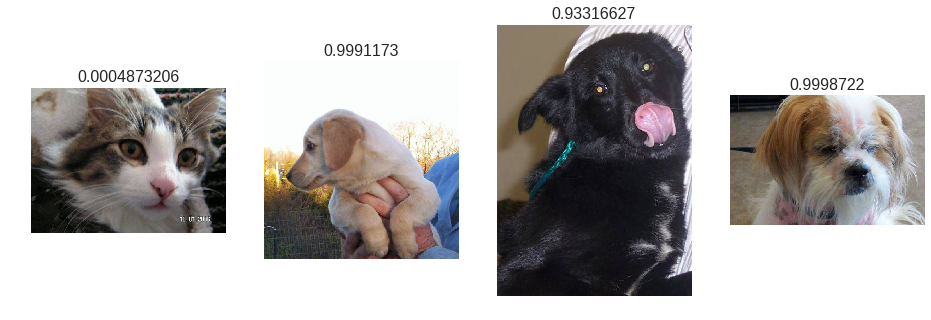

In [28]:
# look at some random correctly labelled images
plot_val_with_title(idxs=rand_by_correct(True),title='Correctly Classified')

In [29]:
# look at some random incorrectly labelled images
plot_val_with_title(idxs=rand_by_correct(False),title='Incorrectly Classified')

Incorrectly Classified


In [0]:
def most_by_mask(mask,mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y,is_correct):
  mult = -1 if (y==1) == is_correct else 1
  return most_by_mask(((preds==data.val_y) == is_correct) & (data.val_y == y), mult)

In [31]:
# check which its most confident are cats
plot_val_with_title(most_by_correct(y=0,is_correct=True),'Most Correct Cats')

Most Correct Cats


Most Correct Dogs


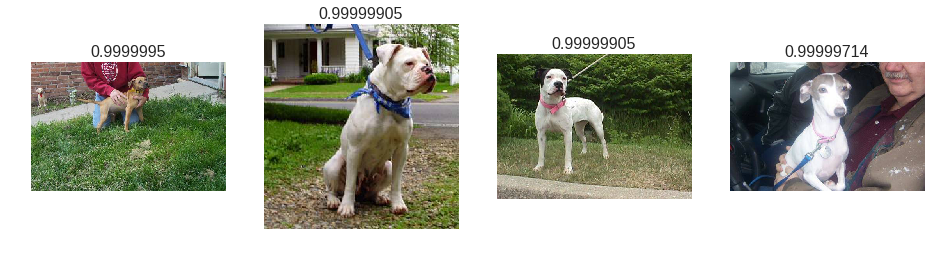

In [32]:
# check which its most confident are dogs
plot_val_with_title(most_by_correct(y=1,is_correct=True),'Most Correct Dogs')

Most Incorrect Cats


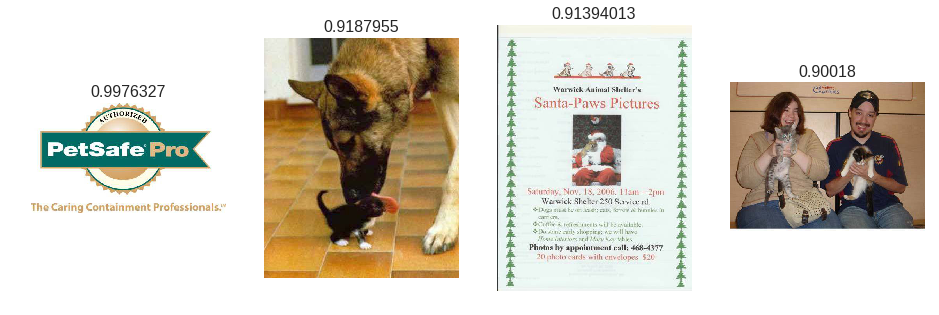

In [33]:
# what it thinks are correct (thinks are dogs but were actually cats)
# i.e. most confident its a dog but its a cat
plot_val_with_title(most_by_correct(y=0,is_correct=False),'Most Incorrect Cats')

In [34]:
# what it thinks are incorrect (thinks are cats but were actually dogs)
# i.e. most confident its a cat but its a dog
plot_val_with_title(most_by_correct(y=1,is_correct=False),'Most Incorrect Dogs')

Most Incorrect Dogs


In [35]:
# see which imgs its most uncertain about (probability closest to threshold of .5)
# sort images after subtracting .5 and grab smallest (closes to .5 originally)
most_uncertain = np.argsort(np.abs(probs -.5))[:4]
plot_val_with_title(idxs=most_uncertain,title="Most uncertain about")

Most uncertain about


We want to look at our data b/c to double check what model is doing well and what it's doing badly (and may need to be fixed), and also to learn things about the data set ( such as what imgs shouldn't be there, like the logos).

One could now grab data (of different things) and put them into a similar dir structure as dogs and cats above and run the same model on it.

### Deep Learning

* from Arthur Samuel's chess-playing software (father of ML)
* traditional ML = difficult and knowledge + time-intensive
* See: Andrew Beck = computational pathologist (CPATH) @ Stanford (now @ Harvard)
  * took pathology slides of cancer, worked w/ many pathologists to figure out what patterns/features were associated w/ long-term survival vs. dying quickly
  * them, programmers wrote algorithms to capture said features that were passed into a logistic regression to predic survival (more accurate than real-life pathologists)
  * this approach took many years of work from domain experts + CS to build
* now much easier w/ DL = contains an **infinitely flexible function**, an **all-purpose parameter fitting** to fit parameters correctly to run the right function that is also **fast and scalable**
* gives a class of functions
* underlying function of FL = **neural network (NN)**  = nonlinear function composed of sums, likelihoods, and S
* NN = consists of a # of simple linear layers interspersed w/ simple non-linear layers
* interspersing supports **universal approximation theorem** = this kind of function can solve any kind of problem to arbitrarily close accuracy as long as enough parameters are added + are added *correctly* (i.e. NN are *proveably* shown to be an infinitely flexible function)
*  all-purpose parameter fitting is done typically via **gradient descent (GD)** = for different parameters, how good are they at solving the problem --> then figure out a slightly better set of parameters + follow the surace of the resulting loss function results downwards until finding the minimum, trying to hit global instead of local minima)
  * turns out, for NN in particular, there aren' actually mult. different local min, just one
  * i.e. there're different parts of the space that're equally good
  * problem = need to do the above in reasonable amt of time
  * GPU's have made this possible (~10x faster than CPU on log scale + are also cheaper)
* Unfortunately, turns out just 1 hidden layer requires exponentially increasing # of params to support universal approximation theorem = *not fast + scalable*
* this is solved via *multiple* hidden layers = super linear scaling (i.e. just a few more hidden layers = multiplicatively more accuracy to  multiplicatively more complex problems)
* this gives rise to **DL** = NN's w/ mult. hidden layers (father = Geoffrey Hinton [Google Brain, 2012])

In our CNN above, the key piece = the **convolution**
* convolution will go over the img pixels via a 3x3 grid to take the pixel w/in the grid + multiplies them by a 3x3 matrix of 9 **kernel values** + adds up the sum
* CNN then trys to find **edges** in the result of these resulting 3x3 matrix multiplication results
* this linear operation can make up a layer in our NN
* then we add a non-linear layer (takes input value + transforms it non-linearly, like sigmoid)
*  Now we typically use a **rectified linear units** (**Rectifier** or **ReLU's**) = take any negative values + replace w/ 0 + leave positive values as-are (`y = max(x,0)` in math terms to do the replacing)
* Key point of combo of linear layer into non-linear function layer = allows us to create arbitrarily complex shapes + combine them together to get to the essence of the universal approximation theorem + why NN's can solve many computable problems

To set these parameters, we use **stochastic (random) GD**
* basic idea = pick random points, move a little bit to some side, find derivative @ that point = direction that's *downward* = the **gradient**
* then move in this direction if its downward (towards the minimum)
* until we reach the minimum
* $x_{n+1} = {x_n} + \frac {dy} {dx}\lambda$
* $\lambda$ = **learning rate** = only want to take a small step in direction of the gradient b/c too large of a step leads to **divergence** not **convergence**
  * but too small = too long to converge
* check out (https://neuralnetworksanddeeplearning.com/chap4.html)

Combination of a convolution, non-linearity layers, + learning SGD = w/ enough kernels/layers, we can actually draw out the original images == i.e. very rich capabilities

This is what the cat vs. dog classifier did above





### Choosing a learning rate

**Learning rate** = how quickly/slowly to update the **weights**/**parameters** = 1 of the most difficult parameters to set, as it significantly affects model performance

Method `learn.lr_find()` from `fastai` library helps find optimal learning rates via a technique developed in [Cyclical Learning Rates for Training Neural Networks (Leslie Smith, 2015)](https://arxiv.org/abs/1506.01186) = keep increasing learning rate from very small value until **loss** stops decreasing (how far prediction is from goal) + then plot learning rate across **batches** to see what it looks like.
* finds at what point during GD we saw best improvement, then use that learning rate
* end up plotting learning rate vs. loss to find best value

1st, create a **learner** b/c we want to know how to set the learning rate for a new (untrained) model


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [38]:
lrf=learn.lr_find()

 84%|████████▍ | 303/360 [00:08<00:01, 37.69it/s, loss=0.581]


See our model was trained again but the model stops @ 84%, before the loss got too bad

`learn` object contains attribute = `sched` = contains our **learning rate scheduler** = has some convienent plotting functionality, such as 

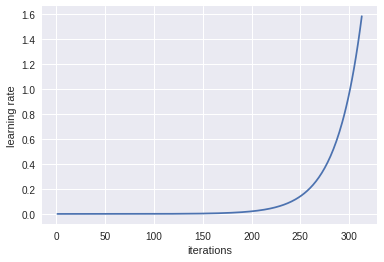

In [39]:
# how learning rate value increases w/ more iterations/minibatch of GD
learn.sched.plot_lr()

See learning rate increases exponentially after some **iteration/min-batch** of SGD 
* w/in each epoch, there's `num_train_samples/num_iterations` minibatches of SGD

Can then look @ learning rate vs. loss to see where loss stop stops decreasing

In [40]:
learn.sched.plot()

Want to find the highest possible learning rate such that loss is still decreasing/improving, which looks to be @ about =1e-2 (or 0.01)

So we use .01 in our `learn.fit()` call.

***Note***: Optimal learning rate can change as  model is trained, so you may want to re-run this function from time to time.

**Epoch** = go through the dataset and each time grab (say 64) images + use each of them once to try + improve the model a bit w/ GD
* choice of # of epochs = arbirtrary
* too many = accuracy may start getting worse
* may take too long w/ a large model/lots of data, so we just run enough epochs in time that's available